<a href="https://colab.research.google.com/github/FilipNim/MKA-MLF/blob/main/MKA_MLF_Miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MKA-MLF Miniproject

In [139]:
import pandas as pd
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import euclidean_distances

import numpy as np
import matplotlib.pyplot as plt


## Import data

In [133]:
data = pd.read_csv("Data_prepared_final.csv")
data = data.drop(data.columns[[0, 1]], axis=1)

In [134]:
data

,cfo_meas,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,-414,-421.076324,0.076097,-46.987598,-27.219631,0.104362,1.129778,0.440299,2.059935
1,-414,-423.571686,0.069879,-47.852627,-26.934967,0.053158,1.050010,0.431240,1.815053
2,-414,-421.033936,0.061466,-48.968697,-27.130722,-0.045913,0.989473,0.447790,1.762053
3,-414,-420.103546,0.078836,-46.756973,-27.005318,0.081583,1.085091,0.443476,1.894204
4,-432,-420.781097,0.066053,-47.048218,-27.358521,0.081920,1.023701,0.465225,1.805841
...,...,...,...,...,...,...,...,...,...
19195,216,215.584991,0.077551,-35.409054,-28.611925,1.875334,0.999375,1.427339,2.248822
19196,216,215.247406,0.044961,-35.508205,-27.954048,1.898758,1.031501,1.478366,2.320668
19197,216,216.761307,0.070066,-35.038486,-28.467575,2.015116,1.090227,1.468599,2.382019
19198,216,215.353516,0.048611,-35.413639,-28.528139,1.916172,0.999381,1.497681,2.283976


## Data Preprocessing

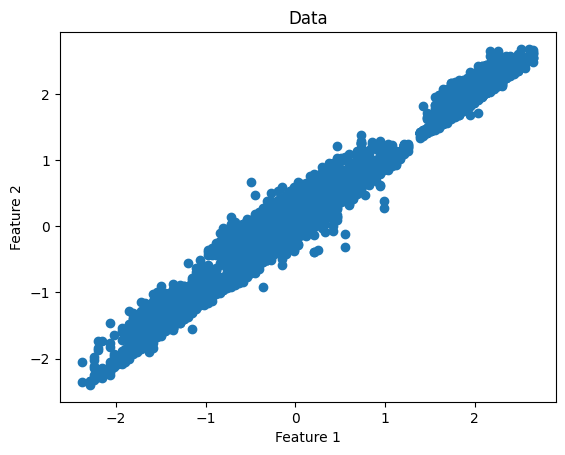

In [135]:
data = StandardScaler().fit_transform(data)
plt.scatter(data[:, 0], data[:, 1])
plt.title('Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [136]:
data

array([[-0.10218242, -0.11905909,  0.68430902, ..., -0.42776025,
        -1.48754722, -0.97623555],
       [-0.10218242, -0.12510636,  0.55147287, ..., -0.75935883,
        -1.49722643, -1.28171204],
       [-0.10218242, -0.11895637,  0.3717129 , ..., -1.01101267,
        -1.47954415, -1.34782615],
       ...,
       [ 1.42819676,  1.42668032,  0.55546696, ..., -0.59217272,
        -0.38884086, -0.57445562],
       [ 1.42819676,  1.42326867,  0.09704912, ..., -0.96982704,
        -0.35776759, -0.69675858],
       [ 1.42819676,  1.4243443 ,  0.40553964, ..., -0.98722263,
        -0.45774141, -0.75513862]])

## Optimization of constants min_samples and epsilon


(19100.0, 19200.0)

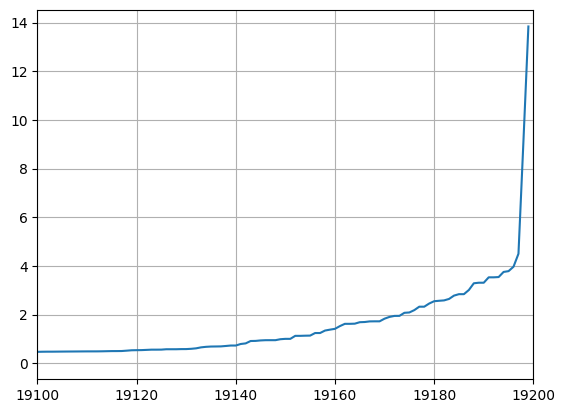

In [137]:
neighbors = NearestNeighbors(n_neighbors=18)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid()
plt.xlim([19100, 19200])

## Model building and results

Number of transmitters: 2


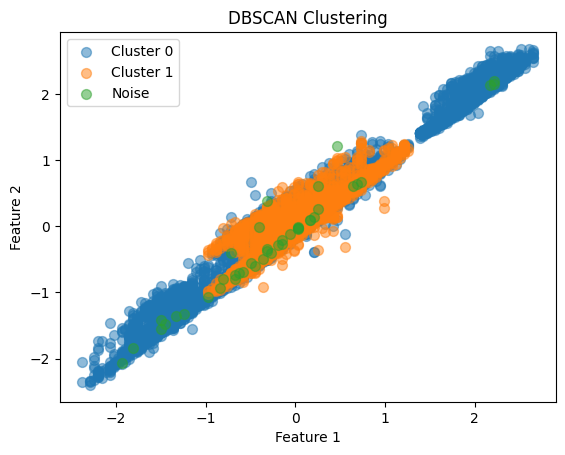

In [138]:
epsilon = 2.5
min_samples = 18

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan.fit(data)

clusters = dbscan.labels_

num_transmitters = len(set(clusters))- (1 if -1 in clusters else 0)
print("Number of transmitters:", num_transmitters)

unique_clusters = set(clusters)

legend_labels = {}

for cluster in unique_clusters:
    if cluster == -1:
        label = 'Noise'
    else:
        label = f'Cluster {cluster}'
    cluster_data = data[clusters == cluster]
    plt.scatter(cluster_data[:, 0],
                cluster_data[:, 1],
                label=label,
                marker='o',
                s=50,
                alpha=0.5)

    legend_labels[cluster] = label

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(labels=legend_labels.values())
plt.show()